<a href="https://colab.research.google.com/github/GuilhermeRuy97/Estudos-DataScience/blob/main/resumo_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Média, moda e mediana

In [1]:
import pandas as pd
from zipfile import ZipFile

caminho = "/content/drive/MyDrive/cursos/bootcampDSalura/dados modulo 3/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands = ".", decimal = ",")
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [2]:
dados["IMC"] = dados["VB17003"] / ((dados["VB17004"]/100)**2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

## <font color=green>1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

ou seja, soma dos valores dividida pelo número de elementos

In [3]:
#Fazendo a média

media = dados["IMC"].mean()
print(media)

20.95825220663186


## <font color=green>2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

In [4]:
mediana = dados["IMC"].median()
print(mediana)

20.190504330368643


## <font color=green>3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. 

*A moda é bastante utilizada para dados qualitativos.

In [5]:
moda = dados["IMC"].mode()
print(moda)

#Neste caso a moda é multimodal (várias modas).

0     16.155478
1     16.718248
2     17.312886
3     18.543714
4     18.556681
5     18.602766
6     19.021555
7     19.169550
8     19.297399
9     19.707910
10    21.082813
dtype: float64


## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

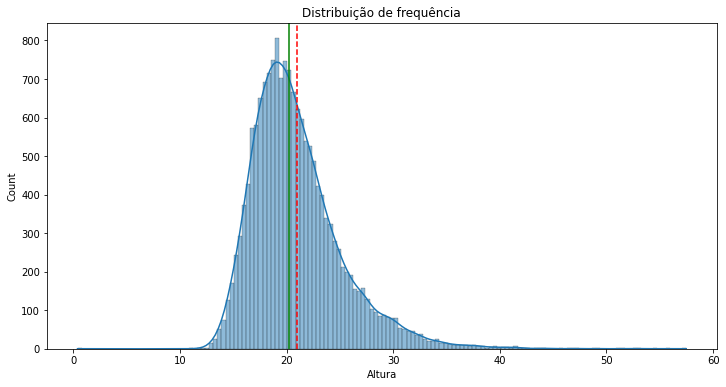

In [6]:
import seaborn as sns

ax = sns.histplot(x = "IMC", data = dados, kde = True)
ax.figure.set_size_inches(12, 6)
ax.axvline(dados.IMC.mean(), color = 'r', linestyle = '--')
ax.axvline(dados.IMC.median(), color ='g', linestyle = '-') 

ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax;

#É possível ver a média em vermelho e a mediana em verde

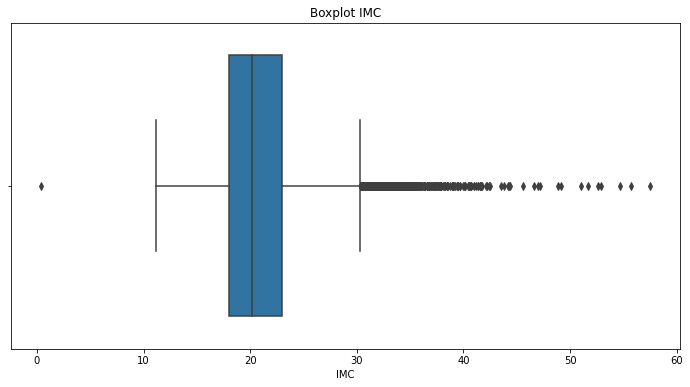

In [7]:
#Também é possível perceber a assimetria através do boxplot

ax = sns.boxplot(x = "IMC", data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot IMC")
ax.set_xlabel("IMC")
ax;

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# Distribuição Normal

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)


## Carcterísticas importantes

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

## $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

Por exemplo, a probabilidade de se escolher uma pessoa entre 1,60m e 1,80m é a área sob a curva.


![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)


Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:


## $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior



## Tabelas padronizadas

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

Exemplo:

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

### Problema A - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img004.png' width='350px'>

Note que até 1,70m a probabilidade é de 50%, pois a curva é simétrica

#### Solução 1

In [8]:
#Criando a tabela padronizada utilizando o scypy
#Essa tabela geralmente é encontrada em livros de estatística

import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


In [9]:
media = 1.70
desvio_padrao = 0.1
x = 1.80
z = (x - media)/ desvio_padrao
print(z)
print("probabilidade = 0.8413")

#Com o resultado de z = 1, procura-se na tabela por z = 01.00 e valor 0.00 para se obter o valor 0.8413;
#Caso Z = 1.05 por exemplo, procura-se por 1.00 e depois por 0.05 ao lado, ou seja, 0.8531.

1.0000000000000009
probabilidade = 0.8413


#### Solução 2

In [10]:
#Podemos passar o valor de z com a função .cdf()

from scipy.stats import norm

probabilidade = norm.cdf(z)
print(probabilidade)

0.8413447460685431


# Teorema do Limite Central

## O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30.


.
## $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$
​
## O desvio padrão das médias amostrais é conhecido como **erro padrão da média**


In [11]:
import pandas as pd
from zipfile import ZipFile

caminho = "/content/drive/MyDrive/cursos/bootcampDSalura/dados modulo 3/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands = ".", decimal = ",")
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [12]:
dados["IMC"] = dados["VB17003"]/ ((dados["VB17004"]/100)**2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [13]:
#Criando 1500 amostras de 2000 elementos

n = 2000
total_de_amostras = 1500
amostras = pd.DataFrame()
for i in range(total_de_amostras):
  _ = dados.IMC.sample(n)
  _.index = range(0, len(_))
  amostras['Amostra_' + str(i)] = _

amostras

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,Amostra_10,Amostra_11,Amostra_12,Amostra_13,Amostra_14,Amostra_15,Amostra_16,Amostra_17,Amostra_18,Amostra_19,Amostra_20,Amostra_21,Amostra_22,Amostra_23,Amostra_24,Amostra_25,Amostra_26,Amostra_27,Amostra_28,Amostra_29,Amostra_30,Amostra_31,Amostra_32,Amostra_33,Amostra_34,Amostra_35,Amostra_36,Amostra_37,Amostra_38,Amostra_39,...,Amostra_1460,Amostra_1461,Amostra_1462,Amostra_1463,Amostra_1464,Amostra_1465,Amostra_1466,Amostra_1467,Amostra_1468,Amostra_1469,Amostra_1470,Amostra_1471,Amostra_1472,Amostra_1473,Amostra_1474,Amostra_1475,Amostra_1476,Amostra_1477,Amostra_1478,Amostra_1479,Amostra_1480,Amostra_1481,Amostra_1482,Amostra_1483,Amostra_1484,Amostra_1485,Amostra_1486,Amostra_1487,Amostra_1488,Amostra_1489,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,24.264172,20.539878,21.424321,23.623982,19.994961,18.006089,24.296225,20.478267,22.089596,23.632812,20.039854,20.738708,14.273466,22.175605,17.922968,19.790903,20.776796,17.395084,20.187781,19.176534,20.553713,18.515625,18.943130,18.930604,19.433401,21.137847,23.009657,15.877902,22.635487,22.378480,25.101676,14.622498,21.175926,20.674744,20.803838,17.357312,34.567353,19.232747,23.623982,24.527828,...,23.259218,15.812110,18.943243,20.867617,23.346048,16.330143,19.783260,18.889949,24.878618,20.786006,20.545820,24.065709,16.537113,31.453170,31.645366,22.282233,22.185840,16.127916,20.000978,17.935032,16.292591,18.863806,23.529412,24.844482,18.574839,14.088889,32.839415,20.244229,19.455514,16.199864,18.426534,19.941468,19.529659,19.223376,17.677603,16.544118,24.136669,20.108957,24.234972,23.360020
1,22.190348,30.175055,17.784134,20.147683,27.382631,19.492187,18.030648,17.206116,15.049680,21.216882,17.106074,19.521144,31.845548,19.624038,17.353969,20.409574,16.611184,20.754513,17.964866,18.891074,19.559431,18.883825,23.286131,19.980417,20.569273,15.621588,20.467616,21.097521,20.390625,21.761796,17.181279,25.312500,20.645786,17.364819,23.844449,27.397530,18.237041,16.765737,16.846331,22.049636,...,17.493382,21.477627,24.785591,38.230725,24.154358,23.470298,22.643868,21.188432,21.505590,20.406528,24.673468,18.778740,19.575279,29.603965,27.033517,21.270555,28.321831,16.120100,16.596946,21.194429,20.641751,22.802768,17.360441,18.217448,19.094811,30.428056,18.940188,41.328125,16.287470,22.435897,19.197208,17.485787,16.684861,16.729917,19.578698,22.590512,26.097659,25.828249,22.239334,22.516308
2,23.684184,21.346838,26.963574,24.231982,19.971957,21.000730,20.176393,19.704272,22.467014,21.428038,22.069861,19.923255,20.567213,23.485158,20.794336,18.986571,20.502017,14.924232,26.413318,22.852200,22.869842,22.716623,19.908010,22.221529,16.326531,19.109642,18.972163,24.922593,15.807463,18.167101,17.442553,21.744983,17.899099,27.105964,25.891012,21.005727,17.132930,19.856809,17.421875,17.476690,...,20.900346,21.149177,21.033235,18.714539,23.485962,20.275458,19.211024,28.567953,16.926106,17.849284,19.036227,21.276271,24.500767,36.262676,32.092413,17.222984,20.308032,22.007112,14.488889,21.467493,23.987516,18.689215,25.135358,20.754513,20.374891,24.314050,21.047387,16.724534,15.094873,19.792750,18.938776,17.778822,16.150385,17.873935,16.991374,16.161253,22.137317,24.034407,19.746681,18.425294
3,19.410553,20.268919,22.604875,18.442546,24.480291,15.188836,31.762398,21.453287,13.764090,20.558530,21.168091,28.310204,25.643034,18.894651,21.186159,20.846834,24.477765,24.732742,23.522988,15.459428,25.867371,24.782677,31.434543,17.542394,23.642243,21.319919,21.721615,27.087233,17.480591,22.009604,21.314879,26.644248,25.960127,17.777778,27.161829,17.659040,21.476783,16.637978,19.321780,19.278960,...,16.572316,26.511037,20.343293,19.293291,17.648172,23.471441,46.975003,19.309650,19.797508,21.791561,16.314656,17.826709,22.302480,19.693280,17.738195,23.630898,23.017820,18.089716,17.630493,24.095522,22.189349,14.658725,1

## O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

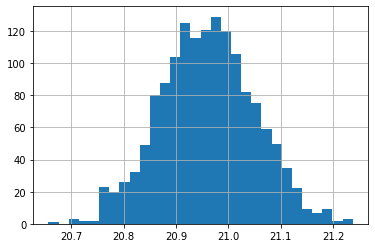

In [14]:
amostras.mean().hist(bins=30)

## O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [15]:
dados.IMC.mean()

20.95825220663186

In [16]:
amostras.mean().mean()

20.960047884046055

##O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [17]:
n

2000

In [18]:
#O desvio padrão se da pelo .std()

import numpy as np

desvio_padrao_amostra_aproximado = dados.IMC.std() / np.sqrt(n)
print(desvio_padrao_amostra_aproximado)

0.09490859583922757


In [19]:
amostras.mean().std()

0.09009990844797997

# Estilizar DataFrames com Pandas

In [20]:
import pandas as pd

In [21]:
carros = {'Marca': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Preco': [22000,25000,27000,35000]
         }

In [22]:
dados = pd.DataFrame(carros)

dados.head()

,Marca,Preco
0,Honda Civic,22000
1,Toyota Corolla,25000
2,Ford Focus,27000
3,Audi A4,35000


In [23]:
dados.style.set_properties(**{'background-color':'blue',
                              'color':'white',
                              'border-color':'black'
                              })

,Marca,Preco
0,Honda Civic,22000
1,Toyota Corolla,25000
2,Ford Focus,27000
3,Audi A4,35000


In [24]:
def cor_orcamento(val):

  if val <= 25000:
    color = 'red'
  else:
    color = 'black'

  return 'color: %s' % color

In [25]:
dados.style.applymap(cor_orcamento, subset = 'Preco')

,Marca,Preco
0,Honda Civic,22000
1,Toyota Corolla,25000
2,Ford Focus,27000
3,Audi A4,35000


In [26]:
#Podemos salvar o resultado em um arquivo excel

dados.style.applymap(cor_orcamento, subset = 'Preco').to_excel("estilizado.xlsx", engine = 'openpyxl')

#Pode-se notar nos arquivos sample_data do colab que o arquivo foi criado

# Intervalo de confiança e População e Amostra

In [27]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/winequality-red.csv'

https://archive.ics.uci.edu/ml/datasets/Wine

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [28]:
import pandas as pd

In [29]:
vinho = pd.read_csv(url, sep = ';')

In [30]:
vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
#Olhando quantas amostras temos

vinho.shape

(1599, 12)

## Qual a chance da nossa amostra retratar a realidade?

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

## Erro inferencial

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

## $$e = z \frac{\sigma}{\sqrt{n}}$$

Suponha que a densidade do vinho se distribui aproximadamente como uma normal. Calcule o desvio padrão e a média de uma amostra de 1000 elementos. Construa um intervalo de confiança para a média populacional assumindo um **nível de significância de 5%**.

In [32]:
#Definindo uma amostra com n = 1000 e uma seed random_state = 202

amostra = vinho.sample(n = 1000, random_state = 202)

In [33]:
desvio_padrao = amostra['density'].std()
desvio_padrao

0.0018428889588943806

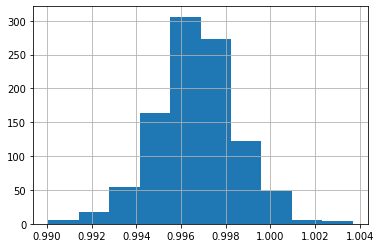

In [34]:
amostra['density'].hist()

In [35]:
significancia = 0.05

In [36]:
confianca = 1 - significancia
confianca

0.95

In [37]:
n = 1000

### Obtendo z - Tabela normal padronizada.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

### Valores de $z$ para os níveis de confiança mais utilizados

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

In [38]:
#Importando a numpy para fazer a raiz quadrada

import numpy as np

In [39]:
sigma = desvio_padrao / np.sqrt(n)

obtendo o $e$

In [40]:
z = 1.96

In [41]:
erro = z * sigma

In [42]:
erro

0.00011422344106370019

### Calculando o intervalo de confiança

In [43]:
media_amostra = amostra['density'].mean()

In [44]:
intervalo = [media_amostra - erro, media_amostra + erro]

In [45]:
intervalo

[0.9965902065589372, 0.9968186534410646]

In [46]:
#Forma alternativa utilizando a scipy com a norm para calcular no intervalo

from scipy.stats import norm

In [47]:
norm.interval(alpha = 0.95, loc = media_amostra, scale = sigma)

(0.9965902086578197, 0.9968186513421821)

## Calculando o tamanho da amostra

Vamos assumir que queremos um erro máximo de 0.0001, nível de confiança de 95% e o desvio padrão populacional é 0.0019.

\begin{equation}
e = z \frac{\sigma}{\sqrt{n}}
\end{equation}
Com desvio padrão conhecido
\begin{equation}
n = \left( z \frac{\sigma}{e} \right)^2
\end{equation}
Com desvio padrão desconhecido
\begin{equation}
n = \left( z \frac{s}{e} \right)^2
\end{equation}


In [48]:
0.95 + 0.025

0.975

In [49]:
#Passamos a área debaixo da curva para o ppf que é de 0.95 + 0.025 (pedaço inicial)

z = norm.ppf(0.975)

In [50]:
sigma = 0.0019

In [51]:
erro = 0.0001

In [52]:
n = (z*sigma / erro)**2

In [53]:
n

1386.766634270579

## População finita
\begin{equation}
n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}

\end{equation}

onde N = numero máximo da população

In [54]:
N = 1500

In [55]:
((z**2)*(sigma**2)*N) / ((z**2)*(sigma**2) + (erro**2)*(N-1))

720.8309662682263

# Teste de Normalidade e Testes Estatísticos (Unicaudal, Bicaudal)

In [56]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/winequality-red.csv'

In [57]:
import pandas as pd

In [58]:
vinho = pd.read_csv(url, sep=';')

In [59]:
vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Teste de normalidade

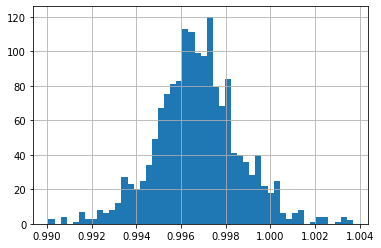

In [60]:
vinho['density'].hist(bins=50)

In [61]:
from scipy.stats import normaltest

O normaltest testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal. 

### Significância ($\alpha$)

In [62]:
significancia = 0.05

### Rejeitamos $H_0$ se o valor $p \leq 0,05$ e aceitamos a hipótese alternativa $H_1$

In [63]:
stat_test, p_valor= normaltest(vinho['density'])

In [64]:
stat_test

30.707749940958617

In [65]:
p_valor <= significancia

#Logo, rejeitamos H0 (hipótese), então, nossa distribuição não é considerada normal

True

In [66]:
#Criando uma distribuição normal para efeitos de comparação

import numpy as np

In [67]:
media, escala = 0, 0.1

In [68]:
dist_normal = np.random.normal(media, escala, 1000)

In [69]:
normaltest(dist_normal)

#Note que neste caso, H0 é maior que 0.05

NormaltestResult(statistic=0.15491326157091653, pvalue=0.9254671603101259)

## Testes paramétricos

### Teste Bicaudal

Este teste é muito utilizado em **testes de qualidade**. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

### <font color='red'>Problema</font>

Nossa produtora de vinhos produz garrafas de 500 ml. Seu processo de produção é quase todo automatizado e as garrafas são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das mesmas para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa extrai, periodicamente, amostras de 50 garrafas para monitorar o processo de produção. Para cada amostra, é realizado um teste de hipóteses para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um nível de significância de 5%.

Suponha agora que uma amostra de 50 embalagens foi selecionada e que a média amostral observada foi de 503,24 ml. Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

In [70]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [71]:
amostra = pd.DataFrame(amostra, columns = ['Amostra'])
amostra.head()

,Amostra
0,509
1,505
2,495
3,510
4,496


In [72]:
media_amostra = amostra.mean()[0]
media_amostra

503.24

In [73]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

4.483803050527347

In [74]:
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu = 500$

### $H_1: \mu \neq 500$

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [75]:
from scipy.stats import norm

In [76]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

### Obtendo $z_{\alpha/2}$

In [77]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [78]:
z = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
z

5.109559775991877

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [79]:
z <= -z_alpha_2

False

In [80]:
z >= z_alpha_2

True

### <font color='green'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [81]:
p_valor = 2 * (1 - norm.cdf(z))
p_valor

3.2291031715203644e-07

In [82]:
p_valor = 2 * (norm.sf(z))
p_valor

3.229103172445718e-07

In [83]:
p_valor <= significancia

True

### Ztest

In [84]:
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [85]:
ztest(x1 = amostra, value = media)

(array([5.10955978]), array([3.22910317e-07]))

### Teste unicaudal

## <font color='red'>Problema</font>

Nossa fábrica de vinho agora está produzindo mii garrafas de 350 ml de seu principal produto que contém, no máximo, 37 gramas de açúcar. Esta alegação nos leva a entender que a quantidade média de açúcar em uma garrafa deve ser igual ou menor que 37 g.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, uma amostra de 25 garrafas. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 amostras.

Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?

### Construindo tabela $t$ de Student

In [86]:
import pandas as pd
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [], 
    index = [i for i in range(1, 31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

index=[('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i / 100), "{0:0.3f}".format((i / 100) / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis = 1, inplace = True)

tabela_t_student

Bicaudal                         0.100    0.090  ...    0.020    0.010
Unicaudal                        0.050    0.045  ...    0.010    0.005
Graus de Liberdade (n - 1) 1   6.31375  7.02637  ...  31.8205  63.6567
                           2   2.91999  3.10398  ...  6.96456  9.92484
                           3   2.35336  2.47081  ...   4.5407  5.84091
                           4   2.13185   2.2261  ...  3.74695  4.60409
                           5   2.01505  2.09784  ...  3.36493  4.03214
                           6   1.94318   2.0192  ...  3.14267  3.70743
                           7   1.89458  1.96615  ...  2.99795  3.49948
                           8   1.85955  1.92799  ...  2.89646  3.35539
                           9   1.83311  1.89922  ...  2.82144  3.24984
                           10  1.81246  1.87677  ...  2.76377  3.16927
                           11  1.79588  1.85877  ...  2.71808  3.10581
                           12  1.78229  1.84402  ...    2.681  3.05454
                           13  1.77093   1.8317  ...  2.65031  3.01228
                           14  1.76131  1.82127  ...  2.62449  2.97684
                           15  1.75305  1.81232  ...  2.60248  2.94671
                           16  1.74588  1.80455  ...  2.58349  2.92078
                           17  1.73961  1.79776  ...  2.56693  2.89823
                           18  1.73406  1.79175  ...  2.55238  2.87844
                           19  1.72913  1.78642  ...  2.53948  2.86093
                           20  1.72472  1.78164  ...  2.52798  2.84534
                           21  1.72074  1.77734  ...  2.51765  2.83136
                           22  1.71714  1.77345  ...  2.50832  2.81876
                           23  1.71387  1.76991  ...  2.49987  2.80734
                           24  1.71088  1.76667  ...  2.49216  2.79694
                           25  1.70814  1.76371  ...  2.48511  2.78744
                           26  1.70562  1.76098  ...  2.47863  2.77871
                           27  1.70329  1.75847  ...  2.47266  2.77068
                           28  1.70113  1.75613  ...  2.46714  2.76326
                           29  1.69913  1.75397  ...  2.46202  2.75639
                           30  1.69726  1.75195  ...  2.45726     2.75

[30 rows x 10 columns]

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

As células da tabela acima são valores de $t$ para uma área ou probabilidade na cauda superior da distribuição $t$.

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

In [87]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

In [88]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra

,Amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49
5,36.53
6,35.49
7,36.90
8,34.52
9,37.30


In [89]:
media_amostra = amostra.mean()
media_amostra

Amostra    36.2504
dtype: float64

In [90]:
desvio_padrao_amostra = amostra.std()
desvio_padrao_amostra

Amostra    0.966754
dtype: float64

In [91]:
media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
graus_de_liberdade = n - 1

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu \leq 37$

### $H_1: \mu > 37$

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [92]:
from scipy.stats import t as t_student

In [93]:
tabela_t_student[22:25]

Bicaudal                         0.100    0.090  ...    0.020    0.010
Unicaudal                        0.050    0.045  ...    0.010    0.005
Graus de Liberdade (n - 1) 23  1.71387  1.76991  ...  2.49987  2.80734
                           24  1.71088  1.76667  ...  2.49216  2.79694
                           25  1.70814  1.76371  ...  2.48511  2.78744

[3 rows x 10 columns]

### Obtendo $t_{\alpha}$

In [94]:
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
t_alpha

1.7108820799094275

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [95]:
t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
t

Amostra   -3.876893
dtype: float64

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [96]:
t >= t_alpha

Amostra    False
dtype: bool

### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [97]:
t

Amostra   -3.876893
dtype: float64

In [98]:
p_valor = t_student.sf(t, df = 24)
p_valor

array([0.99964062])

In [99]:
p_valor <= significancia

array([False])

In [100]:
from statsmodels.stats.weightstats import DescrStatsW

In [101]:
test = DescrStatsW(amostra)

In [102]:
t, p_valor, df = test.ttest_mean(value = media, alternative = 'larger')
print(t[0])
print(p_valor[0])
print(df)

-3.8768931199520447
0.9996406170303819
24.0


In [103]:
p_valor[0] <= significancia

False

# Covariância e Correlação

In [104]:
import pandas as pd

In [105]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/media_salarial.csv'

In [106]:
salarial = pd.read_csv(url,sep='\t')

In [107]:
salarial.head()

,Anos,Salario
0,9.096218,78311.160754
1,14.637429,103897.664526
2,12.255808,97836.261015
3,7.215160,80550.256380
4,6.905628,68555.820963


In [108]:
import seaborn as sns

In [109]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = [10,6]

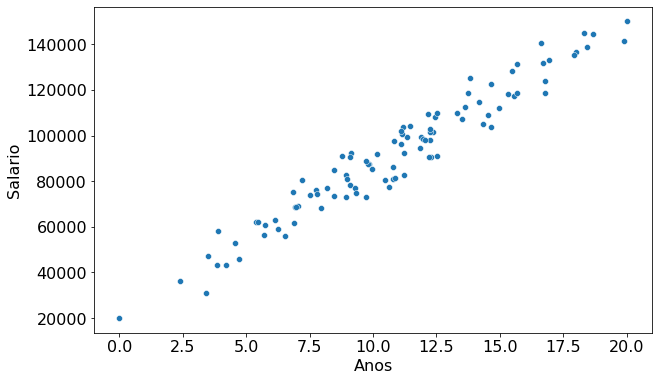

In [110]:
sns.scatterplot(x = 'Anos', y = 'Salario', data = salarial)

## <font color=blue> Covariância </font>

A covariância é a medida do grau de interdependência numérica entre duas variáveis. 

### Covariância populacional

\begin{equation}
\sigma_{xy} = \frac{1}{n} \sum_{i=1}^n (X_i - \mu_x)(Y_i - \mu_y)
\end{equation}

### Covariância amostral
\begin{equation}
S_{xy} = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
\end{equation}

In [111]:
amostra = salarial.sample(n = 20, random_state = 202)

In [112]:
amostra.cov()

,Anos,Salario
Anos,14.191227,8.544902e+04
Salario,85449.017586,5.552975e+08


## <font color=blue> Correlação </font>

### Coeficiente de correlação de Pearson - dados populacionais

# $$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

### Coeficiente de correlação de Pearson - dados amostrais

# $$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente

In [113]:
amostra.corr()

,Anos,Salario
Anos,1.000000,0.962574
Salario,0.962574,1.000000


https://plotlygraphs.medium.com/spurious-correlations-56752fcffb69

# Regressão Linear

In [114]:
import pandas as pd

In [115]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/media_salarial.csv'

In [116]:
salarial = pd.read_csv(url,sep='\t')

In [117]:
salarial.head()

,Anos,Salario
0,9.096218,78311.160754
1,14.637429,103897.664526
2,12.255808,97836.261015
3,7.215160,80550.256380
4,6.905628,68555.820963


In [118]:
import seaborn as sns

In [119]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = [10,6]

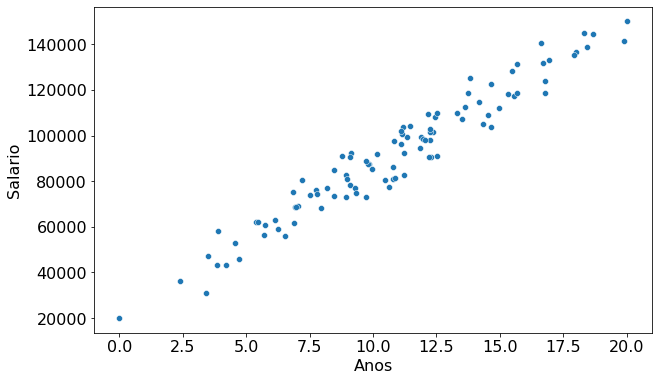

In [120]:
sns.scatterplot(x='Anos',y='Salario',data=salarial)

## <font color=blue>  Regressão Linear </font>

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

Beta1 = onde a reta intercepta o eixo Y

Beta2 = coeficiente angular

In [121]:
salarial.head()

,Anos,Salario
0,9.096218,78311.160754
1,14.637429,103897.664526
2,12.255808,97836.261015
3,7.215160,80550.256380
4,6.905628,68555.820963


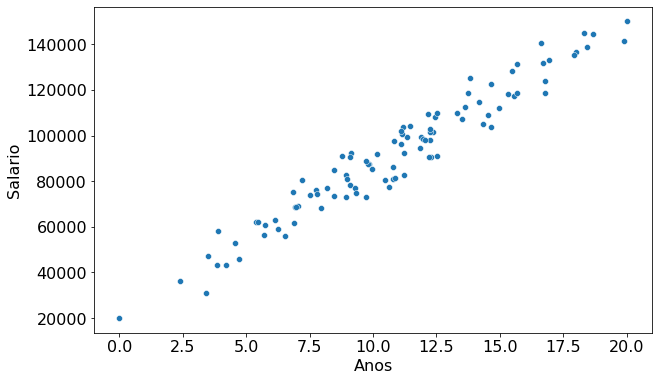

In [122]:
sns.scatterplot(x='Anos',y='Salario',data=salarial)

## $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$

calculo de Beta2
## $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$
calculo de Beta1
## $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

In [123]:
import statsmodels.api as sm

In [124]:
X = sm.add_constant(salarial['Anos'])
X

,const,Anos
0,1.0,9.096218
1,1.0,14.637429
2,1.0,12.255808
3,1.0,7.215160
4,1.0,6.905628
...,...,...
95,1.0,5.755395
96,1.0,9.082997
97,1.0,12.065148
98,1.0,3.894430


In [125]:
Y = salarial['Salario']

In [126]:
X.head()

,const,Anos
0,1.0,9.096218
1,1.0,14.637429
2,1.0,12.255808
3,1.0,7.215160
4,1.0,6.905628


In [127]:
#Fazendo o ajuste da reta com o SM utilizando o odernary list squares (mínimos quadrados ordinários);
#O .fit() faz o ajuste da reta.

resultado_regressao = sm.OLS(Y,X).fit()

In [128]:
resultado_regressao.params

const    22755.182146
Anos      6367.639175
dtype: float64

In [129]:
beta_1 = resultado_regressao.params[0]

In [130]:
beta_2 = resultado_regressao.params[1]

In [131]:
beta_1

22755.182145811403

## <font color=blue>  Intervalo de confiança </font>

O intervalo de confiança propõe uma gama de valores plausíveis para um parâmetro desconhecido. O intervalo de confiança possui um nível de confiança associado. O nível de confiança padrão é 95%. 

In [132]:
resultado_regressao.conf_int()

,0,1
const,19067.657980,26442.706312
Anos,6050.119397,6685.158952


In [133]:
salarial['y_previsto'] = resultado_regressao.predict()

In [134]:
salarial.head()

,Anos,Salario,y_previsto
0,9.096218,78311.160754,80676.613985
1,14.637429,103897.664526,115961.045460
2,12.255808,97836.261015,100795.744300
3,7.215160,80550.256380,68698.714847
4,6.905628,68555.820963,66727.732594


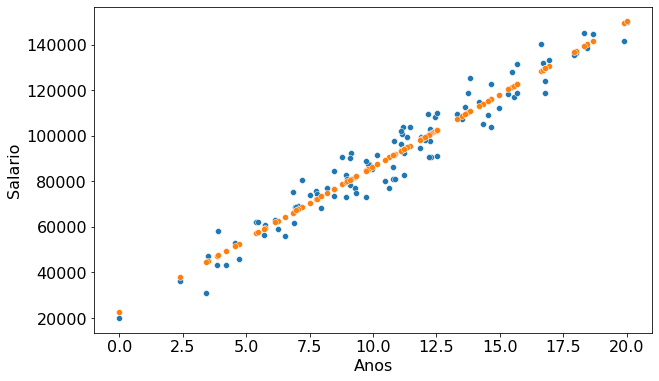

In [135]:
sns.scatterplot(x = 'Anos', y = 'Salario', data = salarial)
sns.scatterplot(x = 'Anos', y = 'y_previsto', data = salarial)

In [136]:
import numpy as np

In [137]:
import statsmodels.api as sm

In [138]:
Xnovo = np.linspace(20,30,11)

In [139]:
Xnovo = sm.add_constant(Xnovo)

In [140]:
fora_da_amostra = resultado_regressao.predict(Xnovo)

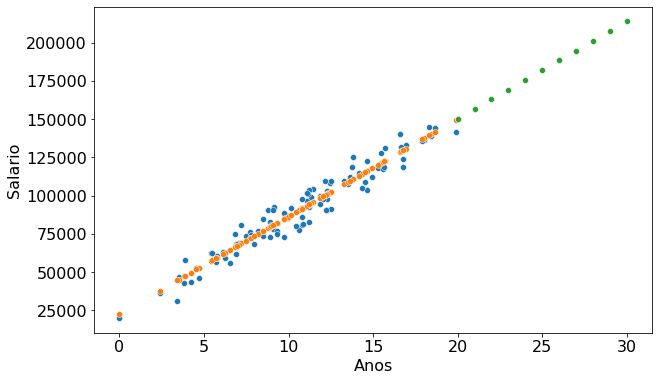

In [141]:
sns.scatterplot(x = 'Anos', y = 'Salario', data = salarial)
sns.scatterplot(x = 'Anos', y = 'y_previsto', data = salarial)
sns.scatterplot(x = Xnovo[:,1], y = fora_da_amostra)

# Análise de resíduos

In [142]:
import numpy as np

In [143]:
Xnovo = np.linspace(20,30,11)

In [144]:
Xnovo = sm.add_constant(Xnovo)

In [145]:
fora_da_amostra = resultado_regressao.predict(Xnovo)

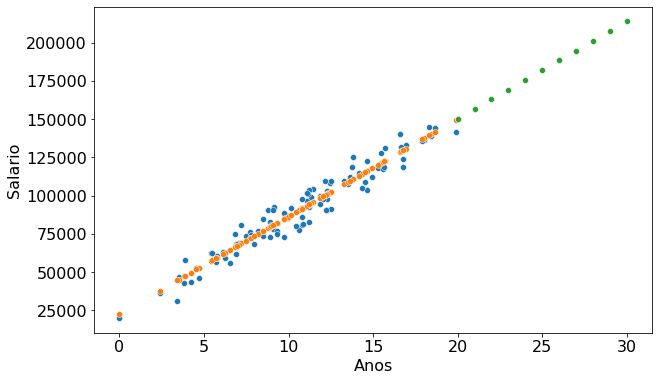

In [146]:
sns.scatterplot(x = 'Anos', y = 'Salario', data = salarial)
sns.scatterplot(x = 'Anos', y = 'y_previsto', data = salarial)
sns.scatterplot(x = Xnovo[:,1], y = fora_da_amostra)

In [147]:
salarial['Resíduo'] = resultado_regressao.resid
salarial.head()

,Anos,Salario,y_previsto,Resíduo
0,9.096218,78311.160754,80676.613985,-2365.453231
1,14.637429,103897.664526,115961.045460,-12063.380934
2,12.255808,97836.261015,100795.744300,-2959.483285
3,7.215160,80550.256380,68698.714847,11851.541534
4,6.905628,68555.820963,66727.732594,1828.088369



1. Média igual a zero;

In [148]:
salarial['Resíduo'].mean()

1.7316779121756553e-11

2. Os valores de $u$ são independentes.

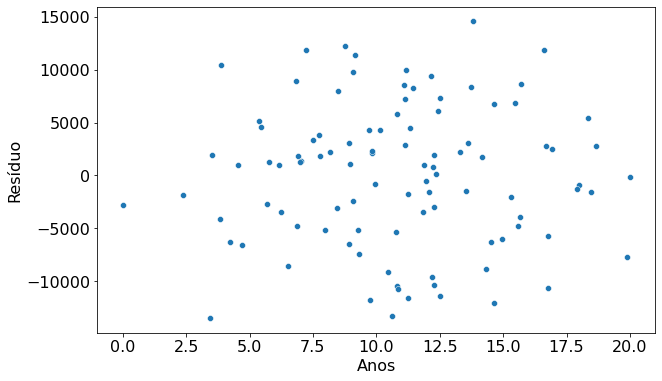

In [149]:
sns.scatterplot(x = salarial['Anos'], y = salarial['Resíduo'])

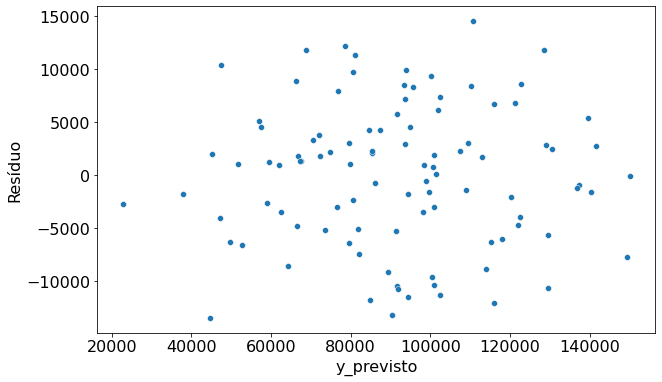

In [150]:
sns.scatterplot(x = salarial['y_previsto'], y = salarial['Resíduo'])

3. Variância de $u$ é a mesma para todos os valores de X;

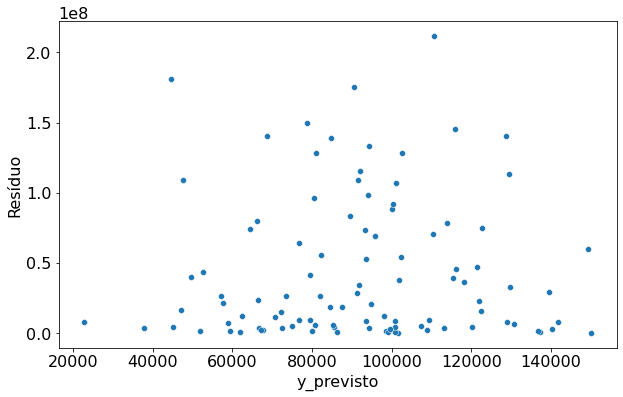

In [151]:
sns.scatterplot(x = salarial['y_previsto'], y = salarial['Resíduo']**2)

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

## <font color=blue>  Coeficiente de determinação - $R^2$ </font>

O quanto a linha de regressão amostral se ajusta aos dados.

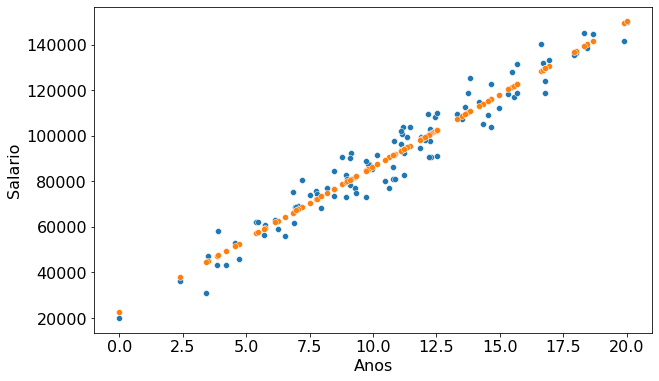

In [152]:
sns.scatterplot(x = 'Anos', y = 'Salario', data = salarial)
sns.scatterplot(x = 'Anos', y = 'y_previsto', data = salarial)

## $$R^2 = \frac{\big[\sum{(Y_i - \bar{Y})(\hat{Y}_i - \bar{Y})}\big]^2}{\sum{(Y_i - \bar{Y}})^2 \sum{(\hat{Y}_i - \bar{Y}})^2}$$

In [153]:
resultado_regressao.rsquared

0.9417294727711081

# Gráficos com Ploty

Existe outra biblioteca para gráficos chama de Ploty, especialmente interessantes para compartilhar o trabalho na web

In [154]:
#Obs, este módulo necessita dos dados do arquivo módulo_1_e_2_Bootcamp_Alura.ipynb

In [155]:
import plotly.graph_objs as go
import plotly.express as px

#import pandas as pd
#import plotly.offline as py
#import plotly.graph_objs as go
#py.init_notebook_mode(connected=True)

#mais informações sobre gráficos interativos em https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b

In [156]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=cincoestados.index, y=cincoestados['11 Rondônia'],name='Rondônia'))
fig.add_trace(go.Scatter(x=cincoestados.index, y=cincoestados['12 Acre'],name='Acre'))
fig.add_trace(go.Scatter(x=cincoestados.index, y=cincoestados['13 Amazonas'],name='Amazonas'))
fig.add_trace(go.Scatter(x=cincoestados.index, y=cincoestados['14 Roraima'],name='Roraima'))
fig.add_trace(go.Scatter(x=cincoestados.index, y=cincoestados['15 Pará'],name='Pará'))

fig.show()

NameError: ignored

In [ ]:
fig2 = px.bar(x=gastos_do_ultimo_mes.index, 
              y=gastos_do_ultimo_mes,labels={'x':'Unidade da Federação','y':'Gastos'})

fig2.show()

In [ ]:
#É possível salvar a imagem

fig2.write_html('imagem.html')